In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from data_processing import database

In [5]:
# Loads movie data
movie_data = database.get_movie_data()
movie_data

,movie_id,url,title,release_year,runtime,genres,country_of_origin,content_type,letterboxd_rating,letterboxd_rating_count,...,is_history,is_fantasy,is_family,is_drama,is_documentary,is_crime,is_comedy,is_animation,is_adventure,is_action
0,34349,/film/here-comes-the-groom/,Here Comes the Groom,1951,113,32928,0,movie,3.27,421,...,0,0,0,0,0,0,1,0,0,0
1,181032,/film/sold-2016/,Sold,2016,97,4096,0,movie,3.34,617,...,0,0,0,1,0,0,0,0,0,0
2,100276,/film/hollywood-1980/,Hollywood,1980,650,8192,1,tv,4.01,628,...,0,0,0,0,1,0,0,0,0,0
3,100880,/film/we-were-there-true-love/,We Were There: True Love,2012,121,4128,4,movie,3.28,415,...,0,0,0,1,0,0,0,0,0,0
4,957050,/film/superman-2025/,Superman,2025,130,393232,0,movie,3.86,2571830,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93853,542888,/film/the-flood-2018/,The Flood,2018,88,8200,0,movie,3.50,368,...,0,0,0,0,1,0,0,0,0,0
93854,542971,/film/fallen-hearts/,Fallen Hearts,2019,88,4104,7,movie,2.96,294,...,0,0,0,1,0,0,0,0,0,0
93855,542719,/film/armageddon-time/,Armageddon Time,2022,114,4096,13,movie,3.37,58538,...,0,0,0,1,0,0,0,0,0,0
93856,542867,/film/purpleboy/,Purpleboy,2019,14,70656,15,movie,3.42,239,...,0,1,0,1,0,0,0,1,0,0


## Numerical Features


In [6]:
# Collects numerical features
numerical_features = movie_data[
    ["release_year", "runtime", "letterboxd_rating", "letterboxd_rating_count"]
]
print("Numerical features:")
print(numerical_features.describe())

Numerical features:
       release_year       runtime  letterboxd_rating  letterboxd_rating_count
count  93858.000000  93858.000000       93858.000000             9.385800e+04
mean    1999.852533     98.177236           3.244409             2.168631e+04
std       25.423683     75.564580           0.449245             1.406610e+05
min     1892.000000      0.000000           0.860000             2.000000e+02
25%     1987.000000     80.000000           3.000000             4.680000e+02
50%     2010.000000     94.000000           3.300000             1.123000e+03
75%     2019.000000    110.000000           3.540000             3.997000e+03
max     2025.000000    992.000000           4.740000             4.934935e+06


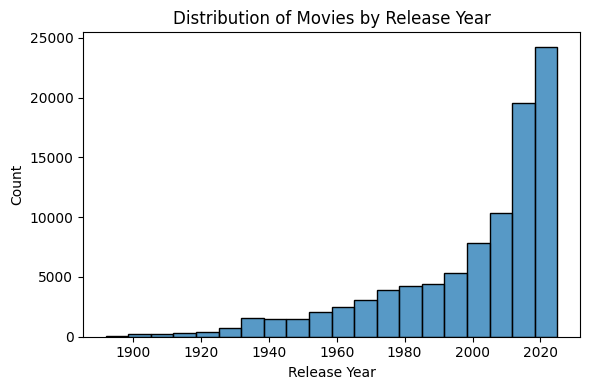

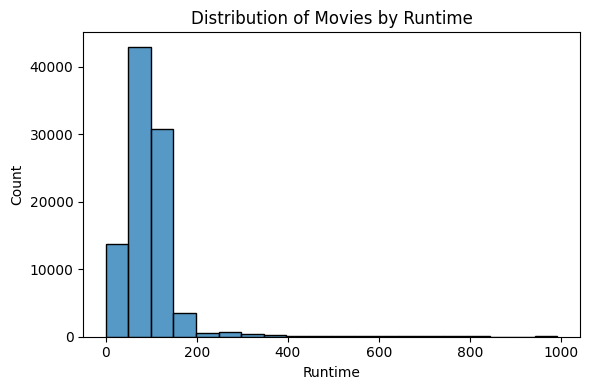

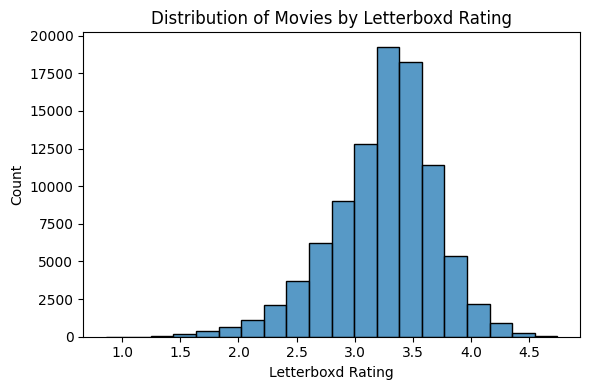

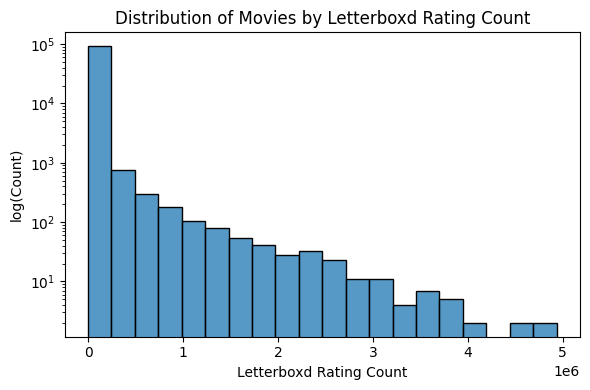

In [ ]:
def plot_numerical_feature_distribution(
    feature: str,
    title: str,
    xlabel: str,
    ylabel: str,
    bins: int = 20,
    yscale: str | None = None,
) -> None:
    """
    Plots the distribution of movies by numerical feature.

    Parameters
    ----------
    feature (str):
        The name of the numerical feature.
    title (str):
        The title of the figure.
    xlabel (str):
        The title of the x axis.
    ylabel (str):
        The title of the y axis.
    bins (int):
        The number of bins in the histogram.
    yscale (str):
        The scale of the y axis.
    """
    plt.figure(figsize=(6, 4))
    sns.histplot(
        data=numerical_features,
        x=feature,
        bins=bins,
    )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if yscale is not None:
        plt.yscale(yscale)
    plt.tight_layout()
    plt.show()


# Plots movies by release_year
plot_numerical_feature_distribution(
    feature="release_year",
    title="Distribution of Movies by Release Year",
    xlabel="Release Year",
    ylabel="Count",
)

# Plots movies by runtime
plot_numerical_feature_distribution(
    feature="runtime",
    title="Distribution of Movies by Runtime",
    xlabel="Runtime",
    ylabel="Count",
)

# Plots movies by letterboxd_rating
plot_numerical_feature_distribution(
    feature="letterboxd_rating",
    title="Distribution of Movies by Letterboxd Rating",
    xlabel="Letterboxd Rating",
    ylabel="Count",
)

# Plots movies by letterboxd_rating_count
plot_numerical_feature_distribution(
    feature="letterboxd_rating_count",
    title="Distribution of Movies by Letterboxd Rating Count",
    xlabel="Letterboxd Rating Count",
    ylabel="log(Count)",
    yscale="log",
)

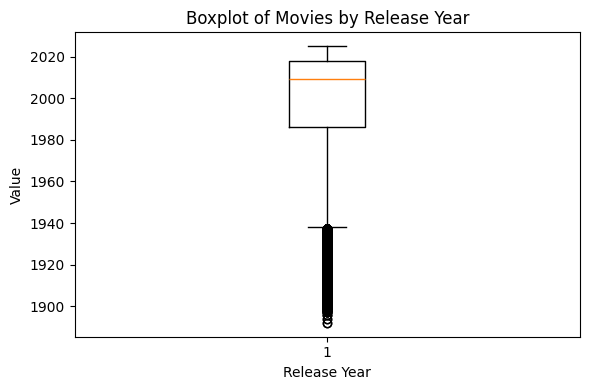

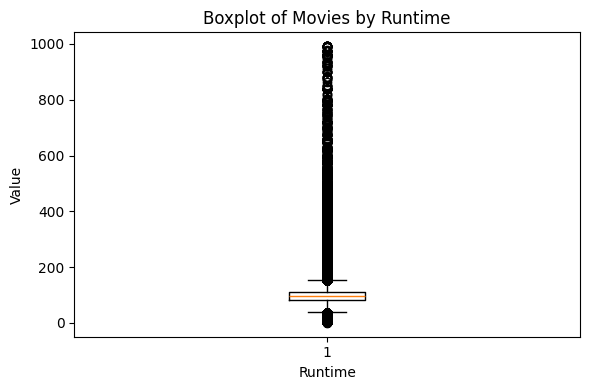

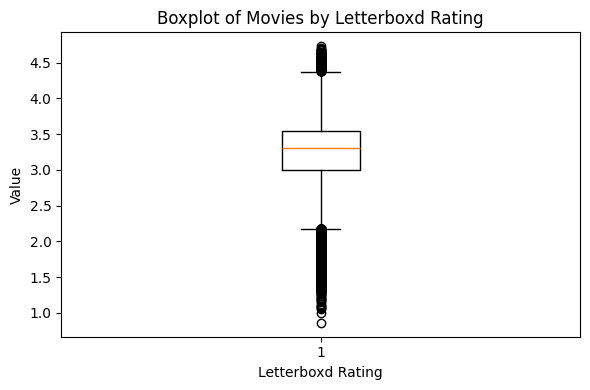

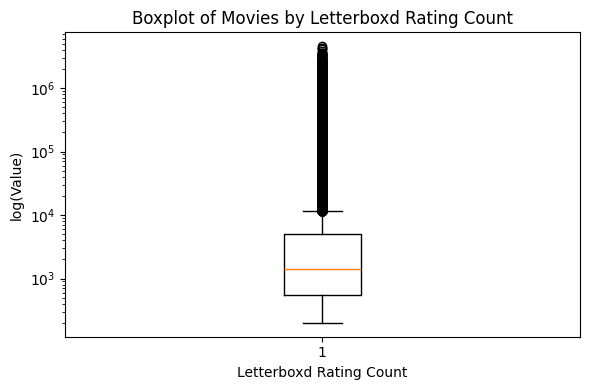

In [ ]:
def plot_numerical_feature_boxplot(
    feature: str,
    title: str,
    xlabel: str,
    ylabel: str,
    bins: int = 20,
    yscale: str | None = None,
) -> None:
    """
    Plots the boxplots of movies by numerical feature.

    Parameters
    ----------
    feature (str):
        The name of the numerical feature.
    title (str):
        The title of the figure.
    xlabel (str):
        The title of the x axis.
    ylabel (str):
        The title of the y axis.
    bins (int):
        The number of bins in the histogram.
    yscale (str):
        The scale of the y axis.
    """
    plt.figure(figsize=(6, 4))
    plt.boxplot(numerical_features[feature])
    plt.title(title)
    if yscale is not None:
        plt.yscale(yscale)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()


# Plots movies by release_year
plot_numerical_feature_boxplot(
    feature="release_year",
    title="Boxplot of Movies by Release Year",
    xlabel="Release Year",
    ylabel="Value",
)

# Plots movies by runtime
plot_numerical_feature_boxplot(
    feature="runtime",
    title="Boxplot of Movies by Runtime",
    xlabel="Runtime",
    ylabel="Value",
)

# Plots movies by letterboxd_rating
plot_numerical_feature_boxplot(
    feature="letterboxd_rating",
    title="Boxplot of Movies by Letterboxd Rating",
    xlabel="Letterboxd Rating",
    ylabel="Value",
)

# Plots movies by letterboxd_rating_count
plot_numerical_feature_boxplot(
    feature="letterboxd_rating_count",
    title="Boxplot of Movies by Letterboxd Rating Count",
    xlabel="Letterboxd Rating Count",
    ylabel="log(Value)",
    yscale="log",
)

## Categorical Features


In [ ]:
# Collects categorical features
categorical_features = movie_data[
    [
        "country_of_origin",
        "content_type",
        "is_action",
        "is_adventure",
        "is_animation",
        "is_comedy",
        "is_crime",
        "is_documentary",
        "is_drama",
        "is_family",
        "is_fantasy",
        "is_history",
        "is_horror",
        "is_music",
        "is_mystery",
        "is_romance",
        "is_science_fiction",
        "is_tv_movie",
        "is_thriller",
        "is_war",
        "is_western",
    ]
]
print("Categorical features:")
print(categorical_features.columns)

Categorical features:
Index(['country_of_origin', 'content_type', 'is_action', 'is_adventure',
       'is_animation', 'is_comedy', 'is_crime', 'is_documentary', 'is_drama',
       'is_family', 'is_fantasy', 'is_history', 'is_horror', 'is_music',
       'is_mystery', 'is_romance', 'is_science_fiction', 'is_tv_movie',
       'is_thriller', 'is_war', 'is_western'],
      dtype='object')


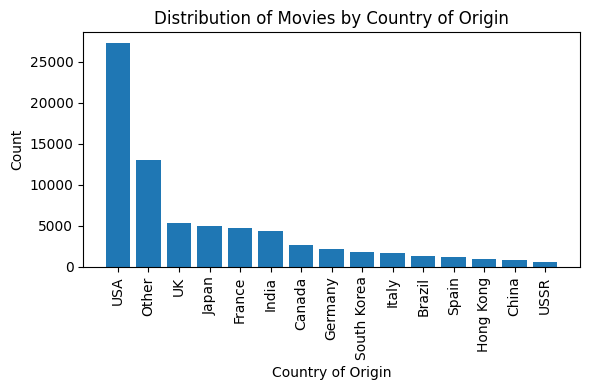

In [ ]:
def assign_countries(country_label: int) -> str:
    """
    Maps numerical values to their country of origin.

    Parameters
    ----------
    country_label (int):
        The numerical value representing the country of origin.

    Returns
    -------
    str:
        The country name corresponding to the numerical label.
    """
    country_map = {
        0: "USA",
        1: "UK",
        2: "China",
        3: "France",
        4: "Japan",
        5: "Germany",
        6: "South Korea",
        7: "Canada",
        8: "India",
        9: "Australia",
        10: "Hong Kong",
        11: "Italy",
        12: "Spain",
        13: "Brazil",
        14: "USSR",
    }

    return country_map.get(country_label, "Other")


def plot_country_of_origin_distribution(countries: pd.Series) -> None:
    """
    Plots the distribution of movies by country of origin.

    Parameters
    ----------
        countries (pd.Series): A one-dimensional ndarray of countries of origin.
    """
    # Maps the numerical values to countries
    countries = countries.copy()
    countries = countries.apply(assign_countries)
    counts = countries.value_counts()

    # Plots the distribution
    plt.figure(figsize=(6, 4))
    plt.bar(x=counts.index, height=counts.to_numpy())
    plt.xticks(rotation=90)
    plt.title("Distribution of Movies by Country of Origin")
    plt.xlabel("Country of Origin")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


plot_country_of_origin_distribution(countries=categorical_features["country_of_origin"])

content_type
movie    69979
tv        2884
Name: count, dtype: int64


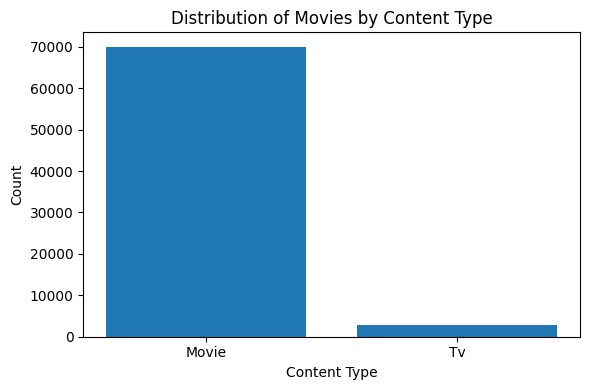

In [ ]:
def plot_content_type_distribution(content_types: pd.Series) -> None:
    """
    Plots the distribution of movies by content type.

    Parameters
    ----------
    content_types (pd.Series):
        A one-dimensional ndarray of content types.
    """
    # Maps the numerical values to content types
    counts = content_types.value_counts()

    # Plots the distribution
    plt.figure(figsize=(6, 4))
    plt.bar(x=counts.index, height=counts.to_numpy())
    plt.xticks(ticks=counts.index, labels=[count.title() for count in counts.index])
    plt.title("Distribution of Movies by Content Type")
    plt.xlabel("Content Type")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


print(categorical_features["content_type"].value_counts())
plot_content_type_distribution(content_types=categorical_features["content_type"])

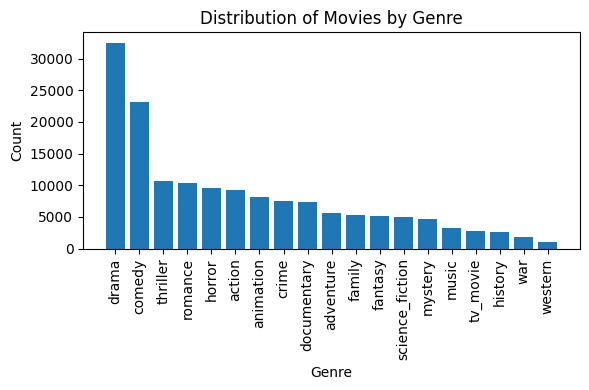

In [ ]:
def plot_genre_distributions(genre_features: pd.DataFrame) -> None:
    """
    Plots the distribution of movies by genre.

    Parameters
    ----------
    genre_features (pd.DataFrame):
        A pandas DataFrame of genres.
    """
    # Counts each genre
    genre_counts = genre_features.sum().sort_values(ascending=False)

    # Plots the distribution
    plt.figure(figsize=(6, 4))
    plt.bar(genre_counts.index, genre_counts.to_numpy())
    plt.xticks(
        ticks=genre_counts.index,
        labels=[genre.replace("is_", "") for genre in genre_counts.index],
        rotation=90,
    )
    plt.title("Distribution of Movies by Genre")
    plt.xlabel("Genre")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


genre_features = categorical_features.drop(
    columns=["country_of_origin", "content_type"]
)
plot_genre_distributions(genre_features=genre_features)